In [142]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [102]:
data1 = pd.read_csv('customers_info.csv')
data2= pd.read_csv('labels.csv')
data3= pd.read_csv('loan_info.csv')

In [103]:
data1.head()

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION
0,1,M,2015-10-27,1986-03-24,EMPLOYEE
1,2,M,2015-11-29,1985-08-18,EMPLOYEE
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE
3,4,M,2015-10-21,1979-01-01,Shop Owner
4,5,M,2015-11-02,1977-01-20,Shop Owner


In [104]:
data2.head()

,Unnamed: 0,ACCOUNT_NUMBER,CUSTOMER_ID,label
0,0,1,1,0
1,1,2,2,0
2,2,3,3,0
3,3,4,4,0
4,4,5,5,0


In [105]:
data3.head()

,CUSTOMER_ID,ACCOUNT_NUMBER,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE
0,1,1,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA
1,2,2,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY
2,3,3,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET
3,4,4,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI
4,5,5,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT


In [106]:
data1['BIRTH_DATE'] = pd.to_datetime(data1['BIRTH_DATE'])
data3[ 'EXPECTED_CLOSE_DATE'] = pd.to_datetime(data3[ 'EXPECTED_CLOSE_DATE'])
data3[ 'LOAN_OPEN_DATE'] = pd.to_datetime(data3[ 'LOAN_OPEN_DATE'])
print(data3.info())
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39597 entries, 0 to 39596
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CUSTOMER_ID             39597 non-null  int64         
 1   ACCOUNT_NUMBER          39597 non-null  int64         
 2   PROGRAM_NAME            39597 non-null  object        
 3   LOAN_OPEN_DATE          39597 non-null  datetime64[ns]
 4   EXPECTED_CLOSE_DATE     39597 non-null  datetime64[ns]
 5   ORIGINAL_BOOKED_AMOUNT  39589 non-null  float64       
 6   CAR_TYPE                37295 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38396 entries, 0 to 38395
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CUSTOMER_ID         38396 non-null  int64

In [107]:
all_data = pd.merge(data1, data2, on='CUSTOMER_ID',how='left')
all_data = pd.merge(all_data, data3, on='CUSTOMER_ID' ,how= 'left')
all_data.head(20)

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_x,label,ACCOUNT_NUMBER_y,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE
0,1,M,2015-10-27,1986-03-24,EMPLOYEE,0,1,0,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,KIA
1,2,M,2015-11-29,1985-08-18,EMPLOYEE,1,2,0,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,CARRY
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE,2,3,0,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,CHEVROLET
3,4,M,2015-10-21,1979-01-01,Shop Owner,3,4,0,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,MITSUBISHI
4,5,M,2015-11-02,1977-01-20,Shop Owner,4,5,0,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,SEAT
5,6,M,2015-10-11,1989-05-22,EMPLOYEE,5,6,0,6,Auto Loans 50% Down Payment - Employed,2015-11-23,2020-11-03,54500.0,CHEVROLET
6,7,M,2016-01-18,1970-01-25,Company Owner,6,7,0,7,Auto Loans 40% Down Payment - Self Employed,2016-01-28,2019-01-03,156000.0,SKODA
7,8,M,2016-01-12,1988-02-29,DOCTOR,7,8,0,8,Auto Loans 20% Down Payment - Employed,2016-01-28,2019-01-03,97500.0,RENAULT
8,9,F,2015-02-26,1983-04-14,Company Owner,8,9,1,9,Auto Loans 30% Down Payment - Self Employed,2016-01-28,2021-02-03,79500.0,CHEVROLET
9,9,F,2015-02-26,1983-04-14,Company Owner,8,9,1,14182,Pick Up and Small Trucks,2015-03-15,2020-03-03,53250.0,NISSAN


In [108]:
all_data = all_data.drop_duplicates()
all_data.head()

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,Unnamed: 0,ACCOUNT_NUMBER_x,label,ACCOUNT_NUMBER_y,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE
0,1,M,2015-10-27,1986-03-24,EMPLOYEE,0,1,0,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,KIA
1,2,M,2015-11-29,1985-08-18,EMPLOYEE,1,2,0,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,CARRY
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE,2,3,0,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,CHEVROLET
3,4,M,2015-10-21,1979-01-01,Shop Owner,3,4,0,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,MITSUBISHI
4,5,M,2015-11-02,1977-01-20,Shop Owner,4,5,0,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,SEAT


In [109]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62318 entries, 0 to 62317
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CUSTOMER_ID             62318 non-null  int64         
 1   SEX                     41025 non-null  object        
 2   CUSTOMER_OPEN_DATE      62318 non-null  object        
 3   BIRTH_DATE              41024 non-null  datetime64[ns]
 4   PROFESSION              40984 non-null  object        
 5   Unnamed: 0              62318 non-null  int64         
 6   ACCOUNT_NUMBER_x        62318 non-null  int64         
 7   label                   62318 non-null  int64         
 8   ACCOUNT_NUMBER_y        62318 non-null  int64         
 9   PROGRAM_NAME            62318 non-null  object        
 10  LOAN_OPEN_DATE          62318 non-null  datetime64[ns]
 11  EXPECTED_CLOSE_DATE     62318 non-null  datetime64[ns]
 12  ORIGINAL_BOOKED_AMOUNT  62310 non-null  float6

In [110]:
all_data.drop(['Unnamed: 0','label'],axis=1,inplace=True)
all_data.head()

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,ACCOUNT_NUMBER_x,ACCOUNT_NUMBER_y,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE
0,1,M,2015-10-27,1986-03-24,EMPLOYEE,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,KIA
1,2,M,2015-11-29,1985-08-18,EMPLOYEE,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,CARRY
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,CHEVROLET
3,4,M,2015-10-21,1979-01-01,Shop Owner,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,MITSUBISHI
4,5,M,2015-11-02,1977-01-20,Shop Owner,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,SEAT


In [111]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62318 entries, 0 to 62317
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CUSTOMER_ID             62318 non-null  int64         
 1   SEX                     41025 non-null  object        
 2   CUSTOMER_OPEN_DATE      62318 non-null  object        
 3   BIRTH_DATE              41024 non-null  datetime64[ns]
 4   PROFESSION              40984 non-null  object        
 5   ACCOUNT_NUMBER_x        62318 non-null  int64         
 6   ACCOUNT_NUMBER_y        62318 non-null  int64         
 7   PROGRAM_NAME            62318 non-null  object        
 8   LOAN_OPEN_DATE          62318 non-null  datetime64[ns]
 9   EXPECTED_CLOSE_DATE     62318 non-null  datetime64[ns]
 10  ORIGINAL_BOOKED_AMOUNT  62310 non-null  float64       
 11  CAR_TYPE                56786 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(3), ob

In [112]:
all_data.isna().sum()

,0
CUSTOMER_ID,0
SEX,21293
CUSTOMER_OPEN_DATE,0
BIRTH_DATE,21294
PROFESSION,21334
ACCOUNT_NUMBER_x,0
ACCOUNT_NUMBER_y,0
PROGRAM_NAME,0
LOAN_OPEN_DATE,0
EXPECTED_CLOSE_DATE,0


# ***IMPUTATION***

In [113]:
impute_mostfreq = SimpleImputer(strategy='most_frequent')
impute_mean = SimpleImputer(strategy='mean')

In [114]:
print(all_data['SEX'].value_counts().head(1))
all_data['SEX'] = impute_mostfreq.fit_transform(all_data['SEX'].values.reshape(-1, 1)).ravel()

SEX
M    29771
Name: count, dtype: int64


In [115]:
print(all_data['CAR_TYPE'].value_counts().head(1))
all_data['CAR_TYPE'] = impute_mostfreq.fit_transform(all_data['CAR_TYPE'].values.reshape(-1, 1)).ravel()

CAR_TYPE
HYUNDAI    11672
Name: count, dtype: int64


In [116]:
print(all_data['PROFESSION'].value_counts().head(1))
all_data['PROFESSION'] = impute_mostfreq.fit_transform(all_data['PROFESSION'].values.reshape(-1, 1)).ravel()

PROFESSION
EMPLOYEE    10809
Name: count, dtype: int64


In [117]:
print(all_data['BIRTH_DATE'].value_counts().head(1))
all_data['BIRTH_DATE'].fillna('1980-01-01',inplace=True)

BIRTH_DATE
1989-01-01    59
Name: count, dtype: int64


In [118]:
print(all_data['ORIGINAL_BOOKED_AMOUNT'].mean())
all_data['ORIGINAL_BOOKED_AMOUNT'] = impute_mean.fit_transform(all_data['ORIGINAL_BOOKED_AMOUNT'].values.reshape(-1, 1)).ravel()

113114.27333734553


In [119]:
all_data.isna().sum()

,0
CUSTOMER_ID,0
SEX,0
CUSTOMER_OPEN_DATE,0
BIRTH_DATE,0
PROFESSION,0
ACCOUNT_NUMBER_x,0
ACCOUNT_NUMBER_y,0
PROGRAM_NAME,0
LOAN_OPEN_DATE,0
EXPECTED_CLOSE_DATE,0


In [120]:
all_data['OPEN_ACCOUNT_YEAR']=pd.DatetimeIndex(all_data['CUSTOMER_OPEN_DATE']).year
all_data

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,ACCOUNT_NUMBER_x,ACCOUNT_NUMBER_y,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,OPEN_ACCOUNT_YEAR
0,1,M,2015-10-27,1986-03-24,EMPLOYEE,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.000000,KIA,2015
1,2,M,2015-11-29,1985-08-18,EMPLOYEE,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.000000,CARRY,2015
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.000000,CHEVROLET,2015
3,4,M,2015-10-21,1979-01-01,Shop Owner,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.000000,MITSUBISHI,2015
4,5,M,2015-11-02,1977-01-20,Shop Owner,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.000000,SEAT,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392,F,2019-08-05,1989-01-01,EMPLOYEE,39592,39592,Auto Loans 50% Down Payment - Employed,2019-08-27,2024-09-03,161700.000000,GELY,2019
62314,38393,F,2019-08-06,1967-08-27,Accountant - Employee,39593,39593,Auto Loans 50% Down Payment - Employed,2019-08-20,2026-08-03,113114.273337,FIAT,2019
62315,38394,M,2019-08-04,1993-03-03,EMPLOYEE,39595,39595,Auto Loans 50% Down Payment - Employed,2019-08-07,2023-07-03,85000.000000,BYD,2019
62316,38395,M,2019-08-18,1996-11-18,EMPLOYEE,39596,39596,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-08-03,147000.000000,HYUNDAI,2019


# ***VISUALIZE***

<Axes: xlabel='SEX', ylabel='ORIGINAL_BOOKED_AMOUNT'>

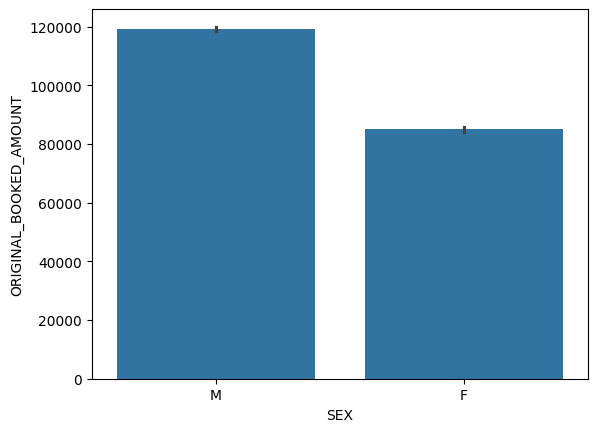

In [ ]:
sns.barplot(x='SEX',y='ORIGINAL_BOOKED_AMOUNT',data=all_data)

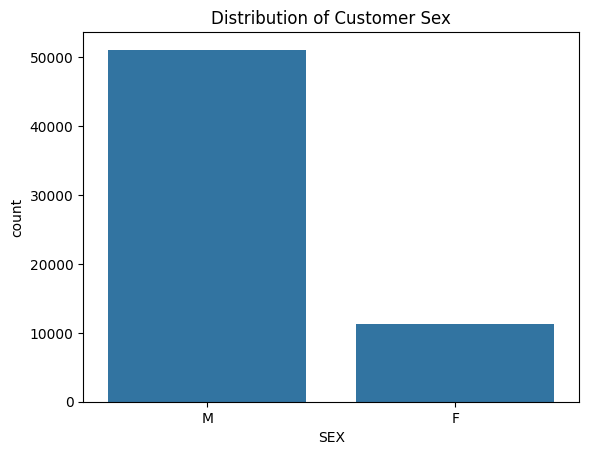

In [ ]:
sns.countplot(data=all_data, x='SEX')
plt.title('Distribution of Customer Sex')
plt.show()

In [ ]:
all_data['YearMonth'] = all_data['LOAN_OPEN_DATE'].dt.to_period('M')
loan_amounts_by_month = all_data.groupby('YearMonth')['ORIGINAL_BOOKED_AMOUNT'].sum().reset_index()
loan_amounts_by_month

,YearMonth,ORIGINAL_BOOKED_AMOUNT
0,2009-09,96000.0
1,2009-12,63600.0
2,2010-02,41400.0
3,2010-03,33000.0
4,2010-04,902400.0
...,...,...
110,2019-04,40376180.0
111,2019-05,45786070.0
112,2019-06,50310749.0
113,2019-07,62775963.0


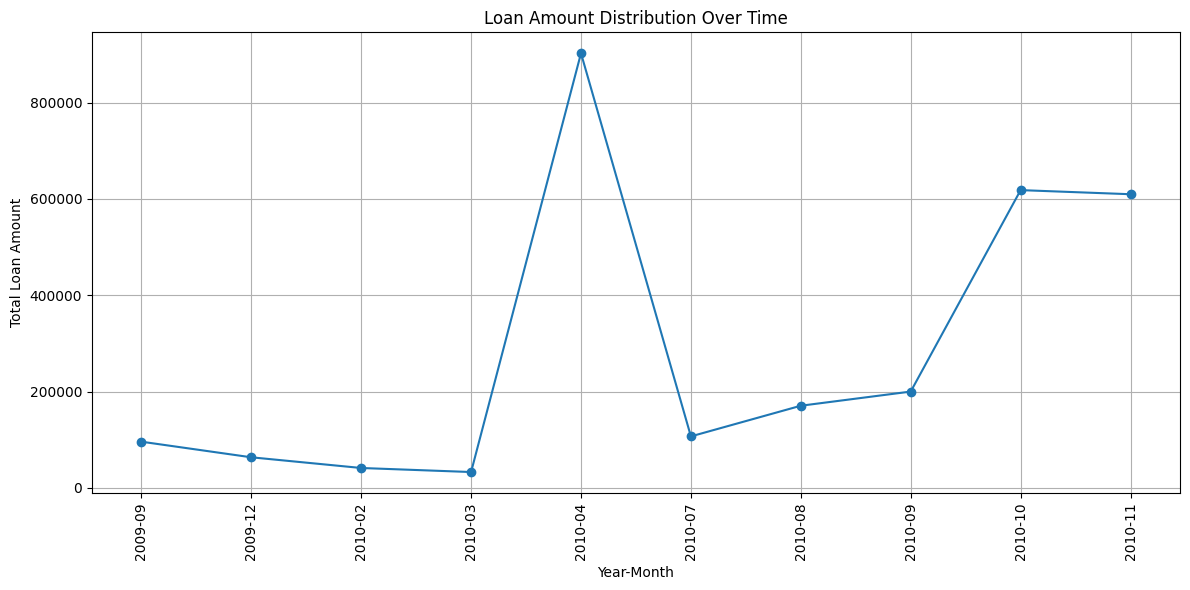

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loan_amounts_by_month['YearMonth'].astype(str).head(10), loan_amounts_by_month['ORIGINAL_BOOKED_AMOUNT'].head(10), marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Distribution Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

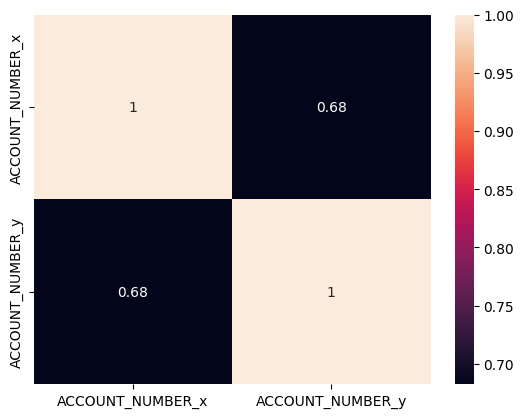

In [ ]:
all_data[['ACCOUNT_NUMBER_x','ACCOUNT_NUMBER_y']].corr()
sns.heatmap(all_data[['ACCOUNT_NUMBER_x','ACCOUNT_NUMBER_y']].corr(),annot=True)

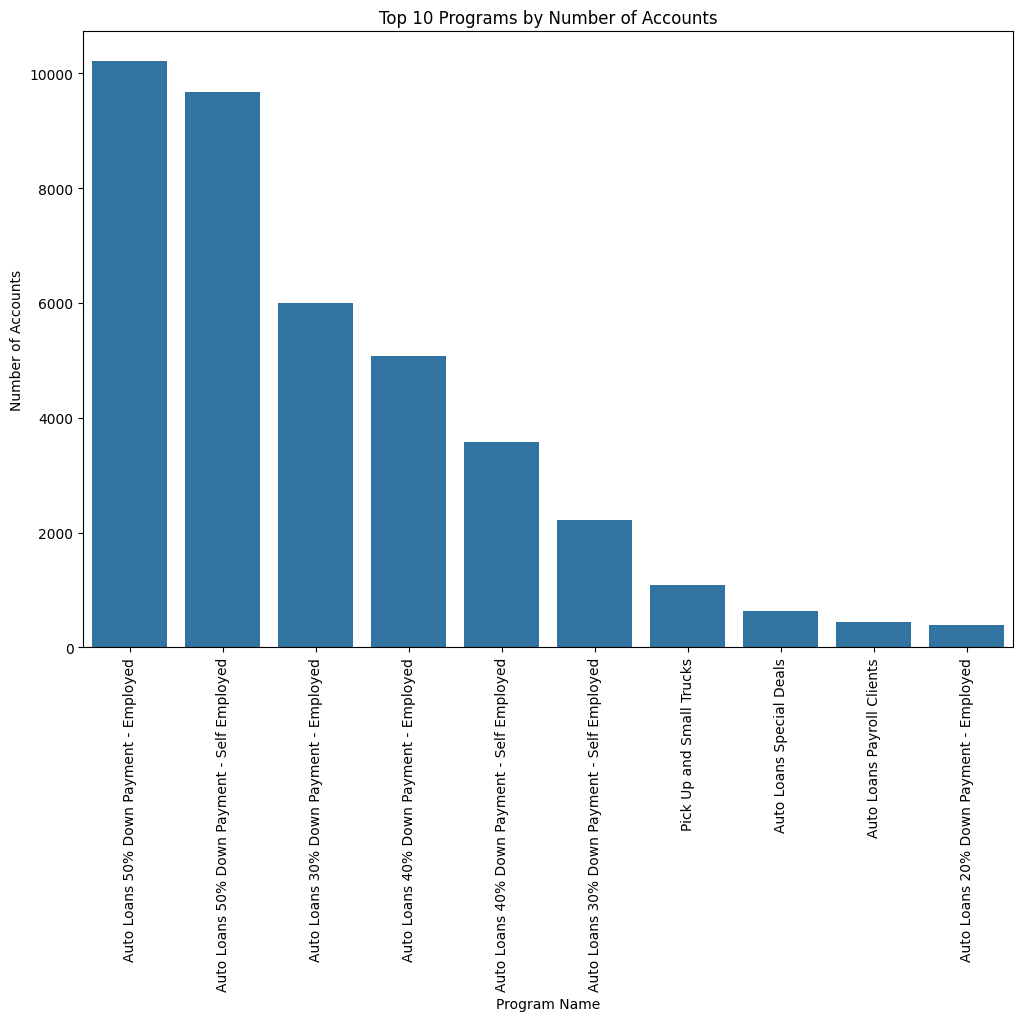

In [ ]:
#top 10 programs based on the account numbers

accounts_per_program = all_data.groupby('PROGRAM_NAME')['ACCOUNT_NUMBER_x'].nunique().reset_index(name='account_count')


top_programs = accounts_per_program.nlargest(10, 'account_count')


plt.figure(figsize=(12, 8))
sns.barplot(x='PROGRAM_NAME', y='account_count', data=top_programs)
plt.xlabel('Program Name')
plt.ylabel('Number of Accounts')
plt.title('Top 10 Programs by Number of Accounts')
plt.xticks(rotation=90)
plt.show()


# ***ENCODING***

In [128]:
#Encoding the features i am going to use in the model
le = LabelEncoder()
all_data['SEX'] = le.fit_transform(all_data['SEX'])
all_data['CAR_TYPE'] = le.fit_transform(all_data['CAR_TYPE'])
all_data['PROFESSION'] = le.fit_transform(all_data['PROFESSION'])
all_data

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,ACCOUNT_NUMBER_x,ACCOUNT_NUMBER_y,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE,OPEN_ACCOUNT_YEAR
0,1,1,2015-10-27,1986-03-24,21,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.000000,30,2015
1,2,1,2015-11-29,1985-08-18,21,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.000000,5,2015
2,3,0,2015-12-28,1985-07-02,23,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.000000,8,2015
3,4,1,2015-10-21,1979-01-01,47,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.000000,39,2015
4,5,1,2015-11-02,1977-01-20,47,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.000000,47,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62313,38392,0,2019-08-05,1989-01-01,21,39592,39592,Auto Loans 50% Down Payment - Employed,2019-08-27,2024-09-03,161700.000000,19,2019
62314,38393,0,2019-08-06,1967-08-27,2,39593,39593,Auto Loans 50% Down Payment - Employed,2019-08-20,2026-08-03,113114.273337,15,2019
62315,38394,1,2019-08-04,1993-03-03,21,39595,39595,Auto Loans 50% Down Payment - Employed,2019-08-07,2023-07-03,85000.000000,3,2019
62316,38395,1,2019-08-18,1996-11-18,21,39596,39596,Auto Loans 50% Down Payment - Employed,2019-08-28,2024-08-03,147000.000000,25,2019


# ***Implementation of a logistic regression model with accuracy***

In [139]:
#Predicting the gender from these features whether its a male or female
features = all_data[['PROFESSION','CAR_TYPE','ORIGINAL_BOOKED_AMOUNT','OPEN_ACCOUNT_YEAR']]
y = all_data['SEX']
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print('-----------------')
print(f"Accuracy: {accuracy*100}")

Precision: 0.8185975609756098
Recall: 1.0
F1 Score: 0.9002514668901928
-----------------
Accuracy: 81.85975609756098
